In [1]:
# I am using a mock dataset

In [2]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Using TensorFlow backend.


In [3]:
Wearable = pd.read_excel('Data_Folder/Demo4_20/4_20_wearable_inside.xlsx',header=0,index_col=0)
Stationary = pd.read_excel('Data_Folder/Demo4_20/4_20_stationary.xlsx',header=0,index_col=False)
Weather = pd.read_csv('Data_Folder/Demo4_20/weather_4_20.txt',delimiter=',',header=None,index_col=False)
Weather.columns=['DTime','Bar','TempIn','HumIn','TempOut','Wind','Wind10','Wdir','HumOut','RainRate','UV','Solar']

In [4]:
Stationary.drop([0,554],inplace=True)

from datetime import datetime
Stationary = Stationary.resample('1T',on='Time').mean()

Wearable.index = range(Wearable.shape[0])
Wearable = Wearable.iloc[:556,:]

from datetime import datetime
for i in range(Weather.shape[0]):
    Weather.set_value(i, 'New_Time', datetime.strptime(Weather.iloc[i,0], '%Y-%m-%d %H:%M:%S'), takeable=False)
Weather = Weather.resample('1T', on='New_Time').mean()
Weather = Weather.iloc[632:1188]

Wearable.index = range(Wearable.shape[0])
Wearable.drop(columns=['Time(s)'],inplace=True)
Wearable.drop(Wearable.columns[0],axis=1,inplace=True)
Stationary.index = range(Stationary.shape[0])
Weather.index = range(Weather.shape[0])
#Stationary = Wea_Stat_Wearable.fillna(method='ffill')
Stationary = Stationary.fillna(method='ffill')
Wearable = Wearable.fillna(method='ffill')
#Wea_Stat = pd.concat([Weather, Stationary],axis=1)
#Wea_Stat


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [5]:
#Wea_Stat

In [6]:
Wea_Stat = pd.concat([Weather,Stationary],axis=1)

### Weather Model 

### decay learning
https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/
<br>may wanna consider comparing adam, sgd, SGD+momentum, SGD+Nest.+momentum

In [42]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(Wea_Stat, Wearable, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_weather = X_train[:,:11]
X_train_stationary = X_train[:,11:]
X_test_weather = X_test[:,:11]
X_test_stationary = X_test[:,11:]
# Initialising the ANN
"""
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 6))

#adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
# Compiling the ANN
#sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
#adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(optimizer = adadelta, loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model.fit(X_train_weather, y_train, batch_size = 10, epochs = 2000)"""

Epoch 1/2000
444/444 [==============================] - 0s 1ms/step - loss: 2945089.2789
Epoch 2/2000
444/444 [==============================] - 0s 193us/step - loss: 465798.4027
Epoch 3/2000
444/444 [==============================] - 0s 188us/step - loss: 335097.1514
Epoch 4/2000
444/444 [==============================] - 0s 203us/step - loss: 333741.0434
Epoch 5/2000
444/444 [==============================] - 0s 188us/step - loss: 333155.7602
Epoch 6/2000
444/444 [==============================] - 0s 189us/step - loss: 263703.2513
Epoch 7/2000
444/444 [==============================] - 0s 189us/step - loss: 272408.2638
Epoch 8/2000
444/444 [==============================] - 0s 190us/step - loss: 280844.3464
Epoch 9/2000
444/444 [==============================] - 0s 183us/step - loss: 277223.6148
Epoch 10/2000
444/444 [==============================] - 0s 168us/step - loss: 260276.4051
Epoch 11/2000
444/444 [==============================] - 0s 180us/step - loss: 267665.2185
Epoch 12/

Epoch 91/2000
444/444 [==============================] - 0s 198us/step - loss: 229162.5279
Epoch 92/2000
444/444 [==============================] - 0s 183us/step - loss: 226249.8119
Epoch 93/2000
444/444 [==============================] - 0s 177us/step - loss: 227933.3171
Epoch 94/2000
444/444 [==============================] - 0s 184us/step - loss: 228753.5043
Epoch 95/2000
444/444 [==============================] - 0s 185us/step - loss: 228255.1709
Epoch 96/2000
444/444 [==============================] - 0s 196us/step - loss: 227083.8626
Epoch 97/2000
444/444 [==============================] - 0s 185us/step - loss: 226639.8833
Epoch 98/2000
444/444 [==============================] - 0s 179us/step - loss: 227181.1000
Epoch 99/2000
444/444 [==============================] - 0s 169us/step - loss: 225234.7386
Epoch 100/2000
444/444 [==============================] - 0s 183us/step - loss: 227042.1890
Epoch 101/2000
444/444 [==============================] - 0s 185us/step - loss: 225558.15

444/444 [==============================] - 0s 196us/step - loss: 214735.9260
Epoch 181/2000
444/444 [==============================] - 0s 207us/step - loss: 214145.5372
Epoch 182/2000
444/444 [==============================] - 0s 176us/step - loss: 214445.5840
Epoch 183/2000
444/444 [==============================] - 0s 189us/step - loss: 215050.5199
Epoch 184/2000
444/444 [==============================] - 0s 192us/step - loss: 213298.7792
Epoch 185/2000
444/444 [==============================] - 0s 178us/step - loss: 213609.9461
Epoch 186/2000
444/444 [==============================] - 0s 180us/step - loss: 214057.7885
Epoch 187/2000
444/444 [==============================] - 0s 178us/step - loss: 214357.4655
Epoch 188/2000
444/444 [==============================] - 0s 188us/step - loss: 213181.2170
Epoch 189/2000
444/444 [==============================] - 0s 182us/step - loss: 213155.9980
Epoch 190/2000
444/444 [==============================] - 0s 176us/step - loss: 212671.0648
Epo

444/444 [==============================] - 0s 196us/step - loss: 197228.0064
Epoch 270/2000
444/444 [==============================] - 0s 213us/step - loss: 197665.5277
Epoch 271/2000
444/444 [==============================] - 0s 206us/step - loss: 196925.3737
Epoch 272/2000
444/444 [==============================] - 0s 195us/step - loss: 196846.5516
Epoch 273/2000
444/444 [==============================] - 0s 192us/step - loss: 197193.3012
Epoch 274/2000
444/444 [==============================] - 0s 168us/step - loss: 195753.3531
Epoch 275/2000
444/444 [==============================] - 0s 162us/step - loss: 195163.9240
Epoch 276/2000
444/444 [==============================] - 0s 181us/step - loss: 194728.0527
Epoch 277/2000
444/444 [==============================] - 0s 182us/step - loss: 194096.0472
Epoch 278/2000
444/444 [==============================] - 0s 172us/step - loss: 196185.1064
Epoch 279/2000
444/444 [==============================] - 0s 164us/step - loss: 194158.3617
Epo

444/444 [==============================] - 0s 162us/step - loss: 179946.2206
Epoch 359/2000
444/444 [==============================] - 0s 188us/step - loss: 178409.7716
Epoch 360/2000
444/444 [==============================] - 0s 165us/step - loss: 181082.0856
Epoch 361/2000
444/444 [==============================] - 0s 171us/step - loss: 180193.1501
Epoch 362/2000
444/444 [==============================] - 0s 183us/step - loss: 180618.5748
Epoch 363/2000
444/444 [==============================] - 0s 185us/step - loss: 180338.8508
Epoch 364/2000
444/444 [==============================] - 0s 177us/step - loss: 180299.5071
Epoch 365/2000
444/444 [==============================] - 0s 184us/step - loss: 179612.9864
Epoch 366/2000
444/444 [==============================] - 0s 191us/step - loss: 179641.6318
Epoch 367/2000
444/444 [==============================] - 0s 184us/step - loss: 180155.4985
Epoch 368/2000
444/444 [==============================] - 0s 181us/step - loss: 178060.4502
Epo

444/444 [==============================] - 0s 163us/step - loss: 166489.3564
Epoch 448/2000
444/444 [==============================] - 0s 169us/step - loss: 166722.9335
Epoch 449/2000
444/444 [==============================] - 0s 158us/step - loss: 167067.5813
Epoch 450/2000
444/444 [==============================] - 0s 160us/step - loss: 164641.3579
Epoch 451/2000
444/444 [==============================] - 0s 164us/step - loss: 165076.1791
Epoch 452/2000
444/444 [==============================] - 0s 167us/step - loss: 164457.3553
Epoch 453/2000
444/444 [==============================] - 0s 173us/step - loss: 164750.6132
Epoch 454/2000
444/444 [==============================] - 0s 182us/step - loss: 164543.5640
Epoch 455/2000
444/444 [==============================] - 0s 175us/step - loss: 167525.2506
Epoch 456/2000
444/444 [==============================] - 0s 178us/step - loss: 165061.7234
Epoch 457/2000
444/444 [==============================] - 0s 185us/step - loss: 164989.1448
Epo

444/444 [==============================] - 0s 159us/step - loss: 154532.4102
Epoch 537/2000
444/444 [==============================] - 0s 192us/step - loss: 152703.1317
Epoch 538/2000
444/444 [==============================] - 0s 171us/step - loss: 152449.6818
Epoch 539/2000
444/444 [==============================] - 0s 183us/step - loss: 153350.3204
Epoch 540/2000
444/444 [==============================] - 0s 179us/step - loss: 152321.7185
Epoch 541/2000
444/444 [==============================] - 0s 178us/step - loss: 153493.8621
Epoch 542/2000
444/444 [==============================] - 0s 156us/step - loss: 152135.9779
Epoch 543/2000
444/444 [==============================] - 0s 164us/step - loss: 152910.5408
Epoch 544/2000
444/444 [==============================] - 0s 172us/step - loss: 153901.1068
Epoch 545/2000
444/444 [==============================] - 0s 176us/step - loss: 152809.7802
Epoch 546/2000
444/444 [==============================] - 0s 181us/step - loss: 152109.6614
Epo

444/444 [==============================] - 0s 162us/step - loss: 144376.2764
Epoch 626/2000
444/444 [==============================] - 0s 188us/step - loss: 145048.1869
Epoch 627/2000
444/444 [==============================] - 0s 172us/step - loss: 143784.6075
Epoch 628/2000
444/444 [==============================] - 0s 172us/step - loss: 144610.3719
Epoch 629/2000
444/444 [==============================] - 0s 181us/step - loss: 144178.0845
Epoch 630/2000
444/444 [==============================] - 0s 176us/step - loss: 145019.0150
Epoch 631/2000
444/444 [==============================] - 0s 194us/step - loss: 144355.2115
Epoch 632/2000
444/444 [==============================] - 0s 211us/step - loss: 143969.8522
Epoch 633/2000
444/444 [==============================] - 0s 186us/step - loss: 144083.3042
Epoch 634/2000
444/444 [==============================] - 0s 187us/step - loss: 144511.7519
Epoch 635/2000
444/444 [==============================] - 0s 179us/step - loss: 144742.9236
Epo

444/444 [==============================] - 0s 175us/step - loss: 137730.6886
Epoch 715/2000
444/444 [==============================] - 0s 192us/step - loss: 137962.0657
Epoch 716/2000
444/444 [==============================] - 0s 178us/step - loss: 137125.5502
Epoch 717/2000
444/444 [==============================] - 0s 181us/step - loss: 138423.3896
Epoch 718/2000
444/444 [==============================] - 0s 188us/step - loss: 138236.7468
Epoch 719/2000
444/444 [==============================] - 0s 167us/step - loss: 137268.0152
Epoch 720/2000
444/444 [==============================] - 0s 167us/step - loss: 138149.2810
Epoch 721/2000
444/444 [==============================] - 0s 173us/step - loss: 136752.8007
Epoch 722/2000
444/444 [==============================] - 0s 183us/step - loss: 137133.1007
Epoch 723/2000
444/444 [==============================] - 0s 180us/step - loss: 137177.0331
Epoch 724/2000
444/444 [==============================] - 0s 182us/step - loss: 137074.7591
Epo

444/444 [==============================] - 0s 182us/step - loss: 133475.4427
Epoch 804/2000
444/444 [==============================] - 0s 184us/step - loss: 131592.3176
Epoch 805/2000
444/444 [==============================] - 0s 179us/step - loss: 131211.2459
Epoch 806/2000
444/444 [==============================] - 0s 180us/step - loss: 133358.6063
Epoch 807/2000
444/444 [==============================] - 0s 189us/step - loss: 132092.6909
Epoch 808/2000
444/444 [==============================] - 0s 188us/step - loss: 129346.4954
Epoch 809/2000
444/444 [==============================] - 0s 188us/step - loss: 132543.6559
Epoch 810/2000
444/444 [==============================] - 0s 184us/step - loss: 130821.1640
Epoch 811/2000
444/444 [==============================] - 0s 174us/step - loss: 131500.8018
Epoch 812/2000
444/444 [==============================] - 0s 186us/step - loss: 132370.6784
Epoch 813/2000
444/444 [==============================] - 0s 211us/step - loss: 132824.4725
Epo

444/444 [==============================] - 0s 178us/step - loss: 128232.5762
Epoch 892/2000
444/444 [==============================] - 0s 186us/step - loss: 127530.5861
Epoch 893/2000
444/444 [==============================] - 0s 185us/step - loss: 127244.1326
Epoch 894/2000
444/444 [==============================] - 0s 195us/step - loss: 128093.3716
Epoch 895/2000
444/444 [==============================] - 0s 174us/step - loss: 128035.6044
Epoch 896/2000
444/444 [==============================] - 0s 190us/step - loss: 127226.2644
Epoch 897/2000
444/444 [==============================] - 0s 186us/step - loss: 129030.1661
Epoch 898/2000
444/444 [==============================] - 0s 182us/step - loss: 127841.2398
Epoch 899/2000
444/444 [==============================] - 0s 190us/step - loss: 124421.3152
Epoch 900/2000
444/444 [==============================] - 0s 186us/step - loss: 126998.7943
Epoch 901/2000
444/444 [==============================] - 0s 178us/step - loss: 126872.7870
Epo

444/444 [==============================] - 0s 187us/step - loss: 122449.3659
Epoch 981/2000
444/444 [==============================] - 0s 194us/step - loss: 122743.8649
Epoch 982/2000
444/444 [==============================] - 0s 182us/step - loss: 121853.7157
Epoch 983/2000
444/444 [==============================] - 0s 178us/step - loss: 123658.7955
Epoch 984/2000
444/444 [==============================] - 0s 178us/step - loss: 123117.6514
Epoch 985/2000
444/444 [==============================] - 0s 179us/step - loss: 122294.7895
Epoch 986/2000
444/444 [==============================] - 0s 184us/step - loss: 122892.8593
Epoch 987/2000
444/444 [==============================] - 0s 179us/step - loss: 123485.8865
Epoch 988/2000
444/444 [==============================] - 0s 179us/step - loss: 123120.5015
Epoch 989/2000
444/444 [==============================] - 0s 182us/step - loss: 122001.9439
Epoch 990/2000
444/444 [==============================] - 0s 188us/step - loss: 123284.0242
Epo

444/444 [==============================] - 0s 169us/step - loss: 118383.6089
Epoch 1069/2000
444/444 [==============================] - 0s 182us/step - loss: 116855.7304
Epoch 1070/2000
444/444 [==============================] - 0s 183us/step - loss: 116775.2192
Epoch 1071/2000
444/444 [==============================] - 0s 176us/step - loss: 117872.3683
Epoch 1072/2000
444/444 [==============================] - 0s 181us/step - loss: 117257.2161
Epoch 1073/2000
444/444 [==============================] - 0s 183us/step - loss: 116437.1344
Epoch 1074/2000
444/444 [==============================] - 0s 181us/step - loss: 117628.4637
Epoch 1075/2000
444/444 [==============================] - 0s 178us/step - loss: 119271.8866
Epoch 1076/2000
444/444 [==============================] - 0s 183us/step - loss: 117570.1744
Epoch 1077/2000
444/444 [==============================] - 0s 181us/step - loss: 117777.5379
Epoch 1078/2000
444/444 [==============================] - 0s 185us/step - loss: 11773

444/444 [==============================] - 0s 174us/step - loss: 112790.8199
Epoch 1157/2000
444/444 [==============================] - 0s 190us/step - loss: 113129.3981
Epoch 1158/2000
444/444 [==============================] - 0s 193us/step - loss: 111924.1706
Epoch 1159/2000
444/444 [==============================] - 0s 203us/step - loss: 113205.2695
Epoch 1160/2000
444/444 [==============================] - 0s 211us/step - loss: 112346.0584
Epoch 1161/2000
444/444 [==============================] - 0s 214us/step - loss: 112054.2837
Epoch 1162/2000
444/444 [==============================] - 0s 201us/step - loss: 111841.4652
Epoch 1163/2000
444/444 [==============================] - 0s 200us/step - loss: 113054.5196
Epoch 1164/2000
444/444 [==============================] - 0s 170us/step - loss: 112764.7017
Epoch 1165/2000
444/444 [==============================] - 0s 179us/step - loss: 113079.4390
Epoch 1166/2000
444/444 [==============================] - 0s 182us/step - loss: 11202

444/444 [==============================] - 0s 178us/step - loss: 105680.1345
Epoch 1245/2000
444/444 [==============================] - 0s 227us/step - loss: 108593.2337
Epoch 1246/2000
444/444 [==============================] - 0s 236us/step - loss: 107644.9576
Epoch 1247/2000
444/444 [==============================] - 0s 233us/step - loss: 106376.5536
Epoch 1248/2000
444/444 [==============================] - 0s 229us/step - loss: 106230.4673
Epoch 1249/2000
444/444 [==============================] - 0s 202us/step - loss: 107964.6921
Epoch 1250/2000
444/444 [==============================] - 0s 216us/step - loss: 105692.4548
Epoch 1251/2000
444/444 [==============================] - 0s 217us/step - loss: 107371.3333
Epoch 1252/2000
444/444 [==============================] - 0s 191us/step - loss: 106217.4606
Epoch 1253/2000
444/444 [==============================] - 0s 237us/step - loss: 106991.2297
Epoch 1254/2000
444/444 [==============================] - 0s 234us/step - loss: 10723

444/444 [==============================] - 0s 175us/step - loss: 100324.5183
Epoch 1333/2000
444/444 [==============================] - 0s 191us/step - loss: 101244.6472
Epoch 1334/2000
444/444 [==============================] - 0s 189us/step - loss: 100469.6491
Epoch 1335/2000
444/444 [==============================] - 0s 215us/step - loss: 101641.2578
Epoch 1336/2000
444/444 [==============================] - 0s 264us/step - loss: 100881.1525
Epoch 1337/2000
444/444 [==============================] - 0s 223us/step - loss: 102524.5802
Epoch 1338/2000
444/444 [==============================] - 0s 219us/step - loss: 100471.0693
Epoch 1339/2000
444/444 [==============================] - 0s 200us/step - loss: 101555.8083
Epoch 1340/2000
444/444 [==============================] - 0s 189us/step - loss: 100719.5856
Epoch 1341/2000
444/444 [==============================] - 0s 182us/step - loss: 99084.6886
Epoch 1342/2000
444/444 [==============================] - 0s 183us/step - loss: 101294

444/444 [==============================] - 0s 174us/step - loss: 96176.5529
Epoch 1421/2000
444/444 [==============================] - 0s 170us/step - loss: 96974.2717
Epoch 1422/2000
444/444 [==============================] - 0s 182us/step - loss: 96849.0715
Epoch 1423/2000
444/444 [==============================] - 0s 187us/step - loss: 97064.0086
Epoch 1424/2000
444/444 [==============================] - 0s 206us/step - loss: 97677.0592
Epoch 1425/2000
444/444 [==============================] - 0s 209us/step - loss: 97946.5211
Epoch 1426/2000
444/444 [==============================] - 0s 186us/step - loss: 96624.4831
Epoch 1427/2000
444/444 [==============================] - 0s 200us/step - loss: 96468.6720
Epoch 1428/2000
444/444 [==============================] - 0s 210us/step - loss: 97015.3672
Epoch 1429/2000
444/444 [==============================] - 0s 178us/step - loss: 97252.2262
Epoch 1430/2000
444/444 [==============================] - 0s 173us/step - loss: 97400.7702
Epoc

444/444 [==============================] - 0s 186us/step - loss: 91678.0411
Epoch 1510/2000
444/444 [==============================] - 0s 180us/step - loss: 92141.8822
Epoch 1511/2000
444/444 [==============================] - 0s 179us/step - loss: 92613.5780
Epoch 1512/2000
444/444 [==============================] - 0s 176us/step - loss: 93035.2220
Epoch 1513/2000
444/444 [==============================] - 0s 188us/step - loss: 92423.6332
Epoch 1514/2000
444/444 [==============================] - 0s 190us/step - loss: 92204.5151
Epoch 1515/2000
444/444 [==============================] - 0s 188us/step - loss: 93039.8950
Epoch 1516/2000
444/444 [==============================] - 0s 181us/step - loss: 92811.1788
Epoch 1517/2000
444/444 [==============================] - 0s 182us/step - loss: 92768.6751
Epoch 1518/2000
444/444 [==============================] - 0s 184us/step - loss: 91719.3253
Epoch 1519/2000
444/444 [==============================] - 0s 194us/step - loss: 91537.3066
Epoc

444/444 [==============================] - 0s 179us/step - loss: 89431.0100
Epoch 1598/2000
444/444 [==============================] - 0s 193us/step - loss: 88487.6284
Epoch 1599/2000
444/444 [==============================] - 0s 182us/step - loss: 89184.6088
Epoch 1600/2000
444/444 [==============================] - 0s 200us/step - loss: 87660.3554
Epoch 1601/2000
444/444 [==============================] - 0s 184us/step - loss: 88817.6094
Epoch 1602/2000
444/444 [==============================] - 0s 182us/step - loss: 88224.6815
Epoch 1603/2000
444/444 [==============================] - 0s 185us/step - loss: 88672.0738
Epoch 1604/2000
444/444 [==============================] - 0s 186us/step - loss: 86558.5801
Epoch 1605/2000
444/444 [==============================] - 0s 185us/step - loss: 88648.8391
Epoch 1606/2000
444/444 [==============================] - 0s 188us/step - loss: 88026.7708
Epoch 1607/2000
444/444 [==============================] - 0s 190us/step - loss: 87948.4988
Epoc

444/444 [==============================] - 0s 169us/step - loss: 85474.5778
Epoch 1687/2000
444/444 [==============================] - 0s 194us/step - loss: 86673.5717
Epoch 1688/2000
444/444 [==============================] - 0s 186us/step - loss: 84698.0972
Epoch 1689/2000
444/444 [==============================] - 0s 190us/step - loss: 86141.7929
Epoch 1690/2000
444/444 [==============================] - 0s 185us/step - loss: 83955.2446
Epoch 1691/2000
444/444 [==============================] - 0s 184us/step - loss: 84745.0458
Epoch 1692/2000
444/444 [==============================] - 0s 182us/step - loss: 84170.7482
Epoch 1693/2000
444/444 [==============================] - 0s 185us/step - loss: 85254.4873
Epoch 1694/2000
444/444 [==============================] - 0s 190us/step - loss: 85952.8166
Epoch 1695/2000
444/444 [==============================] - 0s 187us/step - loss: 83915.2268
Epoch 1696/2000
444/444 [==============================] - 0s 197us/step - loss: 84927.8608
Epoc

444/444 [==============================] - 0s 183us/step - loss: 81260.4322
Epoch 1776/2000
444/444 [==============================] - 0s 190us/step - loss: 84513.6760
Epoch 1777/2000
444/444 [==============================] - 0s 179us/step - loss: 82281.3516
Epoch 1778/2000
444/444 [==============================] - 0s 183us/step - loss: 80415.1026
Epoch 1779/2000
444/444 [==============================] - 0s 202us/step - loss: 81983.4561
Epoch 1780/2000
444/444 [==============================] - 0s 206us/step - loss: 82353.2582
Epoch 1781/2000
444/444 [==============================] - 0s 208us/step - loss: 80864.0837
Epoch 1782/2000
444/444 [==============================] - 0s 205us/step - loss: 81832.8225
Epoch 1783/2000
444/444 [==============================] - 0s 209us/step - loss: 80679.8583
Epoch 1784/2000
444/444 [==============================] - 0s 168us/step - loss: 81035.4203
Epoch 1785/2000
444/444 [==============================] - 0s 186us/step - loss: 82675.5260
Epoc

444/444 [==============================] - 0s 211us/step - loss: 80135.8452
Epoch 1865/2000
444/444 [==============================] - 0s 234us/step - loss: 80033.3137
Epoch 1866/2000
444/444 [==============================] - 0s 229us/step - loss: 80822.4484
Epoch 1867/2000
444/444 [==============================] - 0s 217us/step - loss: 79091.5800
Epoch 1868/2000
444/444 [==============================] - 0s 221us/step - loss: 79519.4440
Epoch 1869/2000
444/444 [==============================] - 0s 222us/step - loss: 78770.8684
Epoch 1870/2000
444/444 [==============================] - 0s 178us/step - loss: 78457.2691
Epoch 1871/2000
444/444 [==============================] - 0s 182us/step - loss: 78363.9575
Epoch 1872/2000
444/444 [==============================] - 0s 181us/step - loss: 78587.4025
Epoch 1873/2000
444/444 [==============================] - 0s 180us/step - loss: 79633.8797
Epoch 1874/2000
444/444 [==============================] - 0s 187us/step - loss: 79440.7759
Epoc

Epoch 1953/2000
444/444 [==============================] - 0s 180us/step - loss: 77050.5912
Epoch 1954/2000
444/444 [==============================] - 0s 188us/step - loss: 78241.8349
Epoch 1955/2000
444/444 [==============================] - 0s 183us/step - loss: 75289.1264
Epoch 1956/2000
444/444 [==============================] - 0s 185us/step - loss: 76924.2619
Epoch 1957/2000
444/444 [==============================] - 0s 183us/step - loss: 76182.6503
Epoch 1958/2000
444/444 [==============================] - ETA: 0s - loss: 62747.528 - 0s 195us/step - loss: 77816.9916
Epoch 1959/2000
444/444 [==============================] - 0s 181us/step - loss: 76752.2296
Epoch 1960/2000
444/444 [==============================] - 0s 183us/step - loss: 76171.0281
Epoch 1961/2000
444/444 [==============================] - 0s 186us/step - loss: 76744.4416
Epoch 1962/2000
444/444 [==============================] - 0s 180us/step - loss: 75796.8977
Epoch 1963/2000
444/444 [===========================

In [74]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_weather,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

71765.40213500586


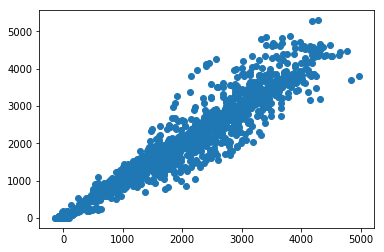

In [43]:
"""y_train_test_weather = model.predict(X_train_weather)
plt.scatter(y_train_test_weather,y_train)
mse = mean_squared_error(y_train_test_weather, y_train)
print mse"""

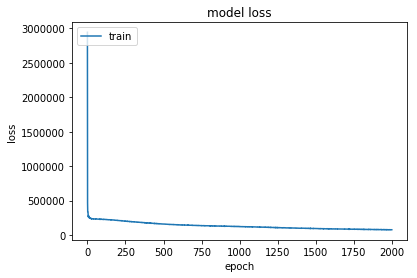

In [44]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Stationary Model 

In [45]:
"""
# Splitting the dataset into the Training set and Test set
#X_train, X_test, y_train, y_test = train_test_split(Stationary, Wearable, test_size = 0.2, random_state = 0)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Initialising the ANN
model2 = Sequential()

# Adding the input layer and the first hidden layer
model2.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model2.add(Dense(units = 6))

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
# Compiling the ANN
model2.compile(optimizer = adam , loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model2.fit(X_train_stationary, y_train, batch_size = 10, epochs = 2000)"""

"\n# Splitting the dataset into the Training set and Test set\n#X_train, X_test, y_train, y_test = train_test_split(Stationary, Wearable, test_size = 0.2, random_state = 0)\n#sc = StandardScaler()\n#X_train = sc.fit_transform(X_train)\n#X_test = sc.transform(X_test)\n\n# Initialising the ANN\nmodel2 = Sequential()\n\n# Adding the input layer and the first hidden layer\nmodel2.add(Dense(32, activation = 'relu', input_dim = 6))\n\n# Adding the second hidden layer\nmodel2.add(Dense(units = 32, activation = 'relu'))\n\n# Adding the third hidden layer\nmodel2.add(Dense(units = 32, activation = 'relu'))\n\n# Adding the output layer\n\nmodel2.add(Dense(units = 6))\n\nadam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)\n# Compiling the ANN\nmodel2.compile(optimizer = adam , loss = 'mean_squared_error')\n\n# Fitting the ANN to the Training set\nhistory = model2.fit(X_train_stationary, y_train, batch_size = 10, epochs = 2000)"

In [46]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train_stationary, y_train)
y_train_test_stationary = ll.predict(X_train_stationary)


4057.447356175202


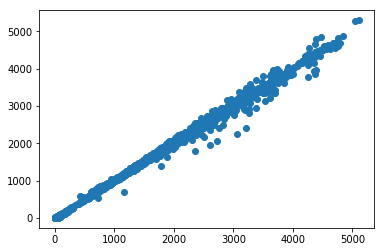

In [47]:
#y_train_test_stationary = model.predict(X_train_weather)
plt.scatter(y_train_test_stationary,y_train)
mse = mean_squared_error(y_train_test_stationary, y_train)
print mse

In [48]:
"""
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()"""

"\nplt.plot(history.history['loss'])\n#plt.plot(history.history['val_loss'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()"

### Weighted Function
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [49]:
y_train_weather = pd.DataFrame(y_train_test_weather)
y_train_stationary = pd.DataFrame(y_train_test_stationary)
X_train_pred = pd.concat([y_train_weather, y_train_stationary],axis=1)


In [59]:
#Pred = [y_pred_weather,y_pred_wearable]
#X_train, X_test, y_train, y_test = train_test_split(train_pred, y_test, test_size = 0.2, random_state = 0)
classifier = Sequential()
# Adding the Single Perceptron or Shallow network
classifier.add(Dense(50,activation='relu', input_dim=12))
# Adding dropout to prevent overfitting
#classifier.add(Dropout(p=0.1))
# Adding the output layer
classifier.add(Dense(output_dim=6))
classifier.compile(optimizer = adadelta, loss = 'mean_squared_error')
#history = classifier.fit(X_train_pred, y_train, validation_data=(X_test,y_test),batch_size=10, nb_epoch=150)
history = classifier.fit(X_train_pred, y_train, batch_size=10, nb_epoch=500)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6)`
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/500
444/444 [==============================] - 0s 1ms/step - loss: 1449264.0090
Epoch 2/500
444/444 [==============================] - 0s 167us/step - loss: 27145.2514
Epoch 3/500
444/444 [==============================] - 0s 153us/step - loss: 19656.9924
Epoch 4/500
444/444 [==============================] - 0s 148us/step - loss: 18727.0855
Epoch 5/500
444/444 [==============================] - 0s 166us/step - loss: 17502.4968
Epoch 6/500
444/444 [==============================] - 0s 139us/step - loss: 16231.2166
Epoch 7/500
444/444 [==============================] - 0s 163us/step - loss: 15239.5548
Epoch 8/500
444/444 [==============================] - 0s 176us/step - loss: 14132.1986
Epoch 9/500
444/444 [==============================] - 0s 163us/step - loss: 13221.4925
Epoch 10/500
444/444 [==============================] - 0s 140us/step - loss: 12303.8145
Epoch 11/500
444/444 [==============================] - 0s 144us/step - loss: 12036.8554
Epoch 12/500
444/444 [========

444/444 [==============================] - 0s 167us/step - loss: 5267.1582
Epoch 94/500
444/444 [==============================] - 0s 180us/step - loss: 5666.7871
Epoch 95/500
444/444 [==============================] - 0s 167us/step - loss: 5631.1430
Epoch 96/500
444/444 [==============================] - 0s 141us/step - loss: 5993.2501
Epoch 97/500
444/444 [==============================] - 0s 138us/step - loss: 6630.8286
Epoch 98/500
444/444 [==============================] - 0s 136us/step - loss: 5489.6532
Epoch 99/500
444/444 [==============================] - 0s 141us/step - loss: 5439.8261
Epoch 100/500
444/444 [==============================] - 0s 200us/step - loss: 6127.0977
Epoch 101/500
444/444 [==============================] - 0s 208us/step - loss: 5619.2748
Epoch 102/500
444/444 [==============================] - 0s 258us/step - loss: 6103.1248
Epoch 103/500
444/444 [==============================] - 0s 177us/step - loss: 5824.4774
Epoch 104/500
444/444 [==================

444/444 [==============================] - 0s 175us/step - loss: 5755.2356
Epoch 185/500
444/444 [==============================] - 0s 207us/step - loss: 5094.1926
Epoch 186/500
444/444 [==============================] - 0s 194us/step - loss: 5610.8024
Epoch 187/500
444/444 [==============================] - 0s 174us/step - loss: 5032.9225
Epoch 188/500
444/444 [==============================] - 0s 150us/step - loss: 5243.8820
Epoch 189/500
444/444 [==============================] - 0s 145us/step - loss: 4975.2462
Epoch 190/500
444/444 [==============================] - 0s 149us/step - loss: 5258.8856
Epoch 191/500
444/444 [==============================] - 0s 143us/step - loss: 5213.6321
Epoch 192/500
444/444 [==============================] - 0s 143us/step - loss: 5953.5544
Epoch 193/500
444/444 [==============================] - 0s 140us/step - loss: 5688.5278
Epoch 194/500
444/444 [==============================] - 0s 138us/step - loss: 5026.2055
Epoch 195/500
444/444 [============

444/444 [==============================] - 0s 178us/step - loss: 5013.1133
Epoch 277/500
444/444 [==============================] - 0s 145us/step - loss: 4786.1499
Epoch 278/500
444/444 [==============================] - 0s 135us/step - loss: 5137.5115
Epoch 279/500
444/444 [==============================] - 0s 179us/step - loss: 4742.6761
Epoch 280/500
444/444 [==============================] - 0s 187us/step - loss: 5127.5929
Epoch 281/500
444/444 [==============================] - 0s 187us/step - loss: 5019.7512
Epoch 282/500
444/444 [==============================] - 0s 143us/step - loss: 5022.9655
Epoch 283/500
444/444 [==============================] - 0s 140us/step - loss: 5366.9384
Epoch 284/500
444/444 [==============================] - 0s 169us/step - loss: 5315.8255
Epoch 285/500
444/444 [==============================] - 0s 187us/step - loss: 4673.0209
Epoch 286/500
444/444 [==============================] - 0s 183us/step - loss: 4771.7775
Epoch 287/500
444/444 [============

444/444 [==============================] - 0s 164us/step - loss: 5205.9430
Epoch 368/500
444/444 [==============================] - 0s 143us/step - loss: 4483.1778
Epoch 369/500
444/444 [==============================] - 0s 136us/step - loss: 4545.4241
Epoch 370/500
444/444 [==============================] - 0s 145us/step - loss: 4655.1312
Epoch 371/500
444/444 [==============================] - 0s 171us/step - loss: 4522.7814
Epoch 372/500
444/444 [==============================] - 0s 179us/step - loss: 5322.5752
Epoch 373/500
444/444 [==============================] - ETA: 0s - loss: 4451.59 - 0s 210us/step - loss: 4703.7351
Epoch 374/500
444/444 [==============================] - 0s 160us/step - loss: 5198.2046
Epoch 375/500
444/444 [==============================] - 0s 149us/step - loss: 4329.6250
Epoch 376/500
444/444 [==============================] - 0s 139us/step - loss: 4594.6295
Epoch 377/500
444/444 [==============================] - 0s 140us/step - loss: 5363.7654
Epoch 378

444/444 [==============================] - 0s 174us/step - loss: 4619.8313
Epoch 459/500
444/444 [==============================] - 0s 163us/step - loss: 4765.8527
Epoch 460/500
444/444 [==============================] - 0s 255us/step - loss: 4902.8302
Epoch 461/500
444/444 [==============================] - 0s 242us/step - loss: 4611.6453
Epoch 462/500
444/444 [==============================] - 0s 166us/step - loss: 5125.7606
Epoch 463/500
444/444 [==============================] - 0s 147us/step - loss: 4648.2130
Epoch 464/500
444/444 [==============================] - 0s 150us/step - loss: 4879.9169
Epoch 465/500
444/444 [==============================] - 0s 159us/step - loss: 4747.2602
Epoch 466/500
444/444 [==============================] - 0s 212us/step - loss: 4352.1059
Epoch 467/500
444/444 [==============================] - 0s 192us/step - loss: 4868.1104
Epoch 468/500
444/444 [==============================] - 0s 152us/step - loss: 4500.3350
Epoch 469/500
444/444 [============

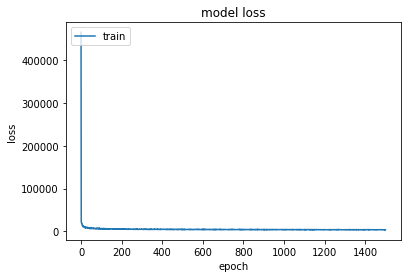

In [51]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### weather prediction

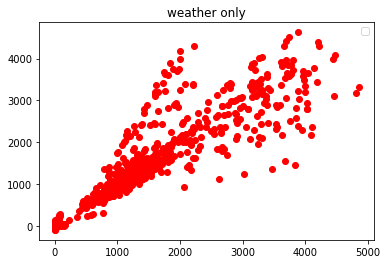

281233.0808681119


In [52]:
"""y_pred_weather = model.predict(X_test_weather)

plt.scatter(y_test,y_pred_weather, color = 'red')
plt.title('weather only')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, y_pred_weather)
print mse """

290784.1826339286


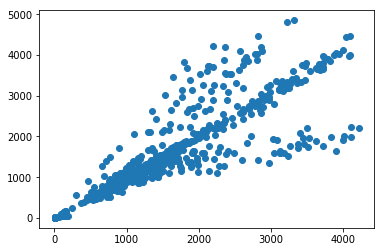

In [75]:
# Get the mean absolute error on the validation data
y_pred_weather = model.predict(X_test_weather)
plt.scatter(y_pred_weather,y_test)
mse = mean_squared_error(y_test_weather, y_test)
print mse

### stationary prediction

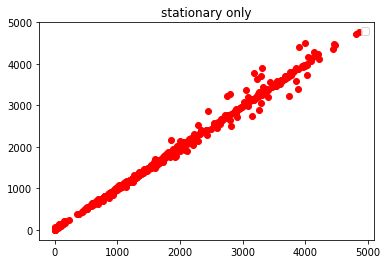

6554.763848017069


In [53]:
#y_pred_stationary = model2.predict(X_test_stationary)
y_pred_stationary = ll.predict(X_test_stationary)
plt.scatter(y_test,y_pred_stationary, color = 'red')
plt.title('stationary only')
plt.legend()
plt.show()
mse2 = mean_squared_error(y_test, y_pred_stationary)
print mse2 

In [76]:
y_test_weather = pd.DataFrame(y_pred_weather)
y_test_stationary = pd.DataFrame(y_pred_stationary)
X_pred = pd.concat([y_test_weather, y_test_stationary],axis=1)
y_pred = classifier.predict(X_pred)

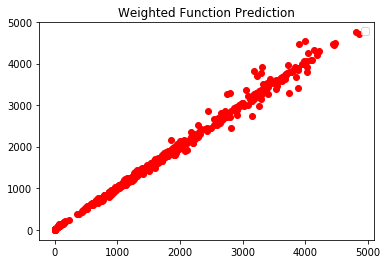

In [77]:
plt.scatter(y_test,y_pred, color = 'red')
plt.title('Weighted Function Prediction')
plt.legend()
plt.show()

In [78]:
mse3 = mean_squared_error(y_test, y_pred)
print mse3 

7685.150925706555


### plot loss history

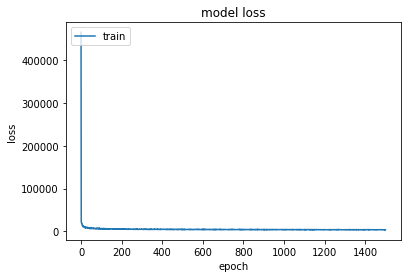

In [57]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train, y_train)
pred2 = ll.predict(X_test)
mse2 = mean_squared_error(y_test,pred2)
print mse2

6192.454428006219


In [ ]:
plt.scatter(y_test,pred2, color = 'red')
plt.title('Lasso prediction')
plt.legend()
plt.show()

### random forest for weather - same mse as MLP

290784.1826339286


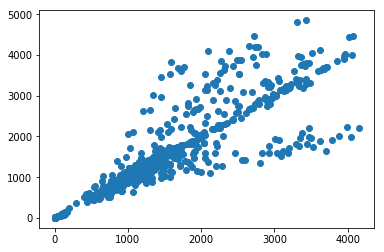

In [72]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_weather,y_train)

# Get the mean absolute error on the validation data
y_test_weather = model.predict(X_test_weather)
plt.scatter(y_test_weather,y_test)
mse = mean_squared_error(y_test_weather, y_test)
print mse

In [66]:
y_train_test_stationary.shape,y_tra

(112, 6)